# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [13]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import nibabel as nib
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import itertools

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [14]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
image = nib.load("/data/TrainingSet/images/hippocampus_001.nii.gz")
print(image.shape)
label = nib.load("/data/TrainingSet/labels/hippocampus_001.nii.gz")
print(label.shape)

(35, 51, 35)
(35, 51, 35)


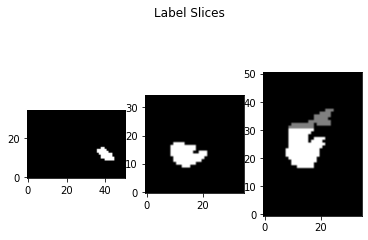

In [15]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)
def show_slices(slices):
	""" Function to display row of image slices """
	fig, axes = plt.subplots(1, len(slices))
	for i, slice in enumerate(slices):
		axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_a = label.get_fdata()[26, :, :]
slice_b =  label.get_fdata()[:, 30, :]
slice_c =  label.get_fdata()[:, :, 16]
show_slices([slice_a, slice_b, slice_c])
plt.suptitle("Label Slices")  
plt.show()

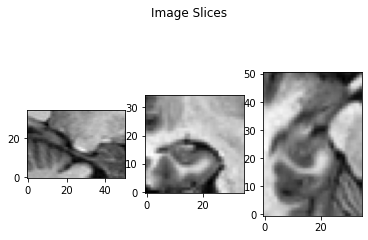

In [16]:
slice_a = image.get_fdata()[26, :, :]
slice_b =  image.get_fdata()[:, 30, :]
slice_c =  image.get_fdata()[:, :, 16]
show_slices([slice_a, slice_b, slice_c])
plt.suptitle("Image Slices")  
plt.show()


Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

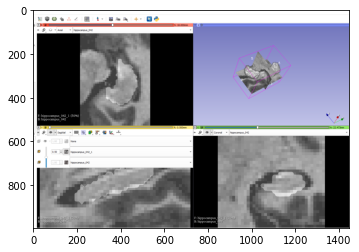

In [17]:
img=mpimg.imread('/home/workspace/img/Slicer.png')
imgplot = plt.imshow(img)
plt.show()

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [18]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?
# Slicer Render slicer image is based on below youtube video: 
# https://www.youtube.com/watch?v=MKLWzD0PiIc
# img = mpimg.imread('slicer_render.png')
# imgplot = plt.imshow(img)
# plt.show()
print(image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [0. 

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [19]:
# TASK: How many bits per pixel are used?
# 8

# TASK: What are the units of measurement?
# xyzt_units

# TASK: Do we have a regular grid? What are grid spacings?
# The grid spacings is as follows:   
# [1. 1. 1. 1. 1. 0. 0. 0.]

# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?
# Affine attribute gives us information about the affine
# Affine: array-like or None, optional. Affine transform for the data. 
# This is used to determine how the data should be sliced for plotting into the 
# sagittal, coronal, and axial view axes. If None, identity is assumed. 
# The aspect ratio of the data are inferred from the affine transform.



In [20]:
np.set_printoptions(precision=3, suppress=True)

In [22]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500
all_volumes=list()
anterior_volumes=list()
posterior_volumes=list()

volume = 0

sliced_labels = [[f,nib.load(os.path.join("/data/TrainingSet/labels/", f))] 
                for f in os.listdir("/data/TrainingSet/labels/")]

def getVolume(label):
    vol = 0
    for i in range(label.shape[0]):
        for j in range(label.shape[1]):
            for k in range(label.shape[2]):
                if label[i][j][k] != 0:
                    vol += 1
    return vol

def getAnteriorVolume(label):
    vol = 0
    for i in range(label.shape[0]):
        for j in range(label.shape[1]):
            for k in range(label.shape[2]):
                if label[i][j][k] == 1:
                    vol += 1
    return vol

def getPosteriorVolume(label):
    vol = 0
    for i in range(label.shape[0]):
        for j in range(label.shape[1]):
            for k in range(label.shape[2]):
                if label[i][j][k] == 2:
                    vol += 1
    return vol

for idx in range(260):
    t_label = sliced_labels[idx][1].get_fdata()
    vol = getVolume(t_label)
    all_volumes.append(vol)
    anterior_volumes.append(getAnteriorVolume(t_label))
    posterior_volumes.append(getPosteriorVolume(t_label))

nonoutlier_volumes = np.array([v for v in all_volumes if (v<4500 and v>2200)])
print(nonoutlier_volumes)
print(anterior_volumes)
print(posterior_volumes)


[3581 3023 3172 3994 2920 3340 3000 2738 3097 3674 3918 2697 3222 2753
 3660 3940 3450 3675 3946 4001 3142 3516 2635 3229 3195 3568 3997 3877
 3435 3733 3445 3749 3503 3522 3831 2382 3820 3460 3146 3679 3704 3686
 2704 3628 2475 3628 2868 3252 3048 3377 3707 3398 2593 3536 3450 3661
 3397 3455 3409 3251 3105 3947 3088 4029 3095 2980 3654 3431 3325 3160
 3658 3483 3353 2920 3210 2830 3856 3979 3326 3356 3219 3202 3555 3152
 2773 3248 3423 3689 2863 3027 3029 3167 3349 2827 3682 3575 2588 3700
 3145 3285 3412 3143 3309 3150 3439 2863 2811 3785 2857 3080 3575 3092
 3698 3040 2757 2894 3742 3478 4151 3113 2950 4030 3763 3420 2534 2956
 3623 3272 3194 2678 3102 2416 3671 3253 4401 2546 3127 3622 3814 3878
 3612 3061 3509 3372 3845 3442 3438 3536 3327 2535 3216 3361 2570 2859
 2613 3611 3109 2629 3582 2739 3409 4263 2819 2931 3450 3594 2471 3201
 3987 2948 4071 4074 3605 3220 3208 3167 3773 2945 2647 2714 3842 2887
 3643 3506 2708 2873 2947 2618 3165 2942 2726 3109 3536 3374 2397 2755
 3650 

## Plotting some charts

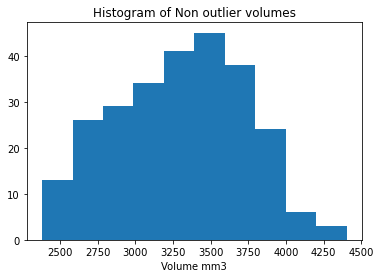

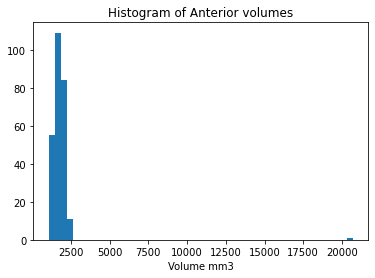

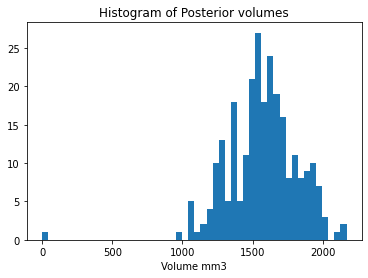

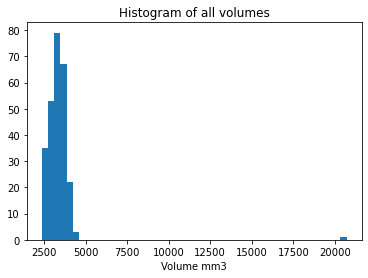

In [27]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.
plt.title('Histogram of Non outlier volumes')
plt.xlabel('Volume mm3')
plt.hist(nonoutlier_volumes, bins=10)
plt.show()

plt.title('Histogram of Anterior volumes')
plt.xlabel('Volume mm3')
plt.hist(anterior_volumes, bins=50)
plt.show()

plt.title('Histogram of Posterior volumes')
plt.xlabel('Volume mm3')
plt.hist(posterior_volumes, bins=50)
plt.show()

plt.title('Histogram of all volumes')
plt.xlabel('Volume mm3')
plt.hist(all_volumes, bins=50)
plt.show()




<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!